In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0,1508,0,2358,0
LoanAmount,NaN,128,66,120,141
Loan_Amount_Term,360,360,360,360,360


statistical Overview


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Summary of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#test 1: check if dup

In [7]:
df.duplicated().any()

False

drop unnecessary columns

In [8]:
df = df.drop("Loan_ID", axis=1)
df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0,1508,0,2358,0
LoanAmount,NaN,128,66,120,141
Loan_Amount_Term,360,360,360,360,360
Credit_History,1,1,1,1,1


In [9]:
# Splitting data into categorical and numerical.

cat_data = []
num_data = []

for index, type in enumerate(df.dtypes):
    if type == "object":
        cat_data.append(df.iloc[:, index])
    else:
        num_data.append(df.iloc[:,index])

In [10]:
cat_data = pd.DataFrame(cat_data).transpose()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [11]:
num_data = pd.DataFrame(num_data).transpose()
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [12]:
#getting deep into categorical data
cat_data.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [13]:
# Filling missing values with mode.

cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [14]:
#  Filling missing values in the numerical data.
#  Firstly, let's check the stats.
num_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
num_data.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [16]:
#  For Loan amount since there is major difference between median and mean. So, let's fill the missing values with median.

num_data.LoanAmount = num_data.LoanAmount.fillna(num_data["LoanAmount"].median())
num_data.LoanAmount.isna().sum()

0

In [17]:
# Filling remaining missing values with previously occuring value in resspective columns.

num_data.Loan_Amount_Term = num_data.Loan_Amount_Term.fillna(method="bfill")
num_data.Credit_History = num_data.Credit_History.fillna(method="bfill")

In [18]:
# Rechecking, if any missing values remaining.
num_data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

Distribution for Numerical Data

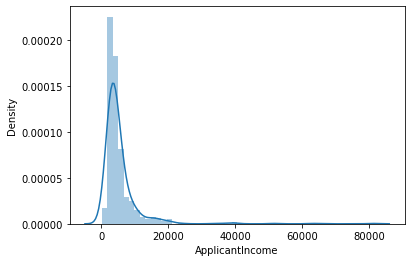

In [19]:
sns.distplot(num_data.ApplicantIncome);

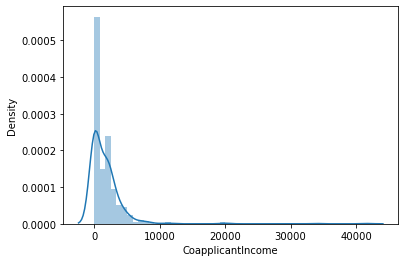

In [20]:
sns.distplot(num_data.CoapplicantIncome);

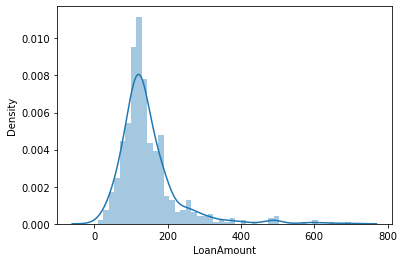

In [21]:
sns.distplot(num_data.LoanAmount);

In [22]:
#  Since above plots are not gaussian. Let's normalise them and get rid of outliers.

num_data.ApplicantIncome = np.log(num_data.ApplicantIncome)
num_data.CoapplicantIncome = np.log(num_data.CoapplicantIncome + 1)  # Since some values are zero to avoid log 0 =infinity.
num_data.LoanAmount = np.log(num_data.LoanAmount)
num_data.Loan_Amount_Term = np.log(num_data.Loan_Amount_Term)

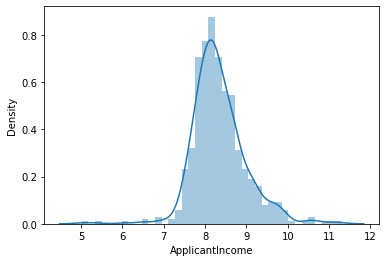

In [23]:
#   Again checking the plots.

sns.distplot(num_data.ApplicantIncome);

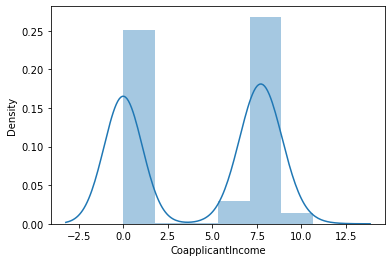

In [24]:
sns.distplot(num_data.CoapplicantIncome);

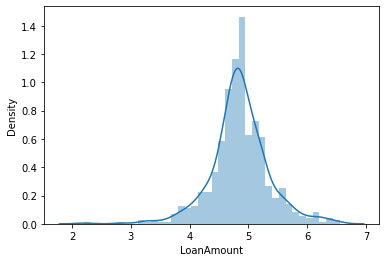

In [25]:
sns.distplot(num_data.LoanAmount);

Categorical Visualization

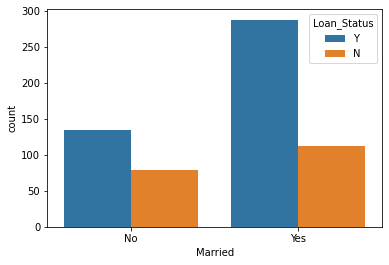

In [26]:
#  Married v/s Loan status
sns.countplot(x="Married", hue="Loan_Status", data=cat_data);

#  There is higher chance of loan approval if you are married.

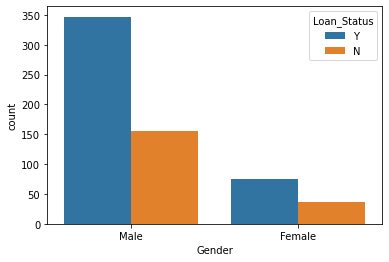

In [27]:
#  Gender v/s Loan status
sns.countplot(x="Gender", hue="Loan_Status", data=cat_data);

#  Most of the males have got there loans approved.

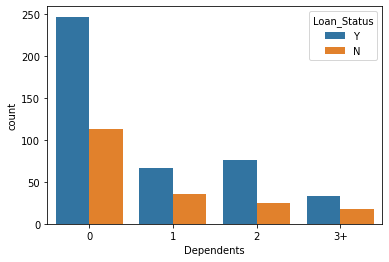

In [28]:
#  Dependents v/s Loan status
sns.countplot(x="Dependents", hue="Loan_Status", data=cat_data);

#  Having zero dependency increases the probability of loan approval.

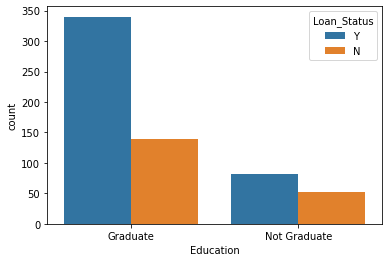

In [29]:
#  Education v/s Loan status
sns.countplot(x="Education", hue="Loan_Status", data=cat_data);

#  Graduation preffered over non graduates.

In [30]:
#  Concatenating the updated categorical and numerical data

data = pd.concat([num_data, cat_data], axis=1)
data.head().T

,0,1,2,3,4
ApplicantIncome,8.67403,8.43011,8.00637,7.85671,8.69951
CoapplicantIncome,0,7.3192,0,7.76599,0
LoanAmount,4.85203,4.85203,4.18965,4.78749,4.94876
Loan_Amount_Term,5.8861,5.8861,5.8861,5.8861,5.8861
Credit_History,1,1,1,1,1
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No


Converting Categorical Data to numerical

In [31]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

cols = ['Gender', 'Married', 'Education', 
        'Self_Employed', 'Property_Area', 
        'Loan_Status', 'Dependents']
for col in cols:
    data[col] = LE.fit_transform(data[col])

data.head().T

,0,1,2,3,4
ApplicantIncome,8.674026,8.430109,8.006368,7.856707,8.699515
CoapplicantIncome,0.000000,7.319202,0.000000,7.765993,0.000000
LoanAmount,4.852030,4.852030,4.189655,4.787492,4.948760
Loan_Amount_Term,5.886104,5.886104,5.886104,5.886104,5.886104
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
Married,0.000000,1.000000,1.000000,1.000000,0.000000
Dependents,0.000000,1.000000,0.000000,0.000000,0.000000
Education,0.000000,0.000000,0.000000,1.000000,0.000000
Self_Employed,0.000000,0.000000,1.000000,0.000000,0.000000


Visualizing Correlation

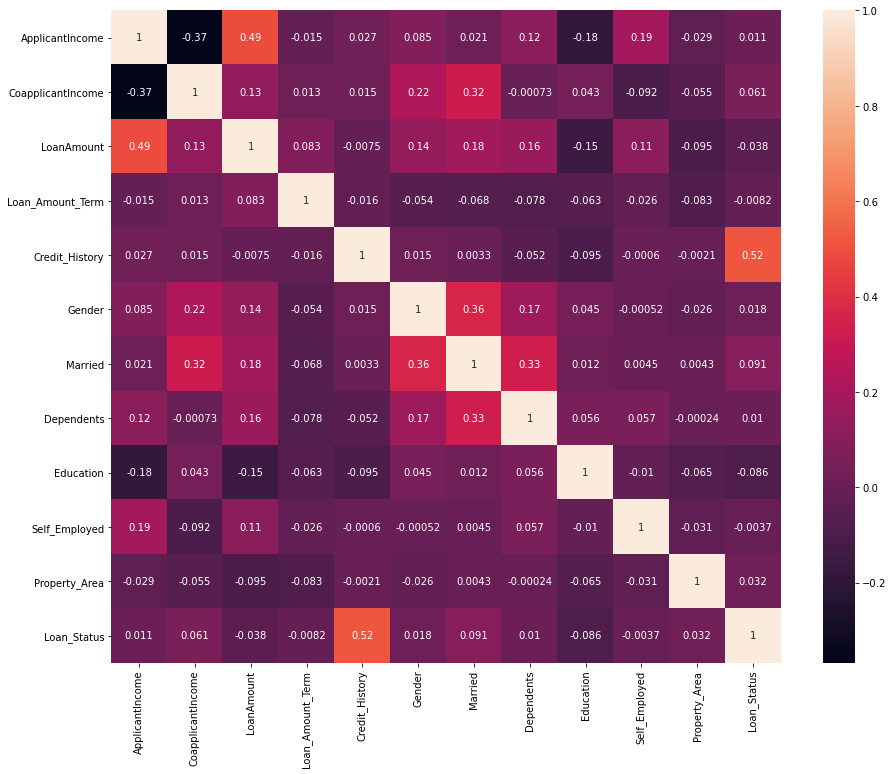

In [32]:
corr = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True);

Interpretation:
* The dependent variable Loan_status has less correlation with Loan amount term and Self employed.
Shall drop them during modelling.

Modelling:

In [33]:
#  Splitting into x and y

x = data.drop(["Loan_Amount_Term", "Self_Employed", "Loan_Status"], axis=1)
y = data["Loan_Status"]

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [35]:
#  Put models in a dictionary

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix



models = {'RandomForestClassifier': RandomForestClassifier(),
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'LogisticRegression': LogisticRegression(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC()
         }

def Fit_Score(model, x_train, y_train, x_test, y_test, x, y):
    
    
    np.random.seed(45)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = {"Accuracy": model.score(x_test, y_test),
                              "cv_acc": np.mean(cross_val_score(model, x, y, cv=5, scoring="accuracy"))}
    return model_scores

In [36]:
Scores = Fit_Score(model=models, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, x=x, y=y)
pd.DataFrame(Scores.values(), Scores.keys())

,Accuracy,cv_acc
RandomForestClassifier,0.718919,0.781794
ExtraTreesClassifier,0.708108,0.749220
DecisionTreeClassifier,0.648649,0.688951
LogisticRegression,0.778378,0.802972
KNeighborsClassifier,0.718919,0.749207
SVC,0.686486,0.713301


Improving the models.
* Further tunning the hyper parameters.



1. Random Forest Classifier
a. Random Search CV

In [37]:
grid = {"n_estimators": np.arange(10, 1000, 50),
       "max_depth": [3, 10],
       "min_samples_split": np.arange(2, 20, 2),
       "min_samples_leaf": np.arange(1, 20, 2)}
#  Tunning

np.random.seed(45)
rs_clf = RandomizedSearchCV(RandomForestClassifier(n_jobs=1), 
                            param_distributions=grid, 
                            cv=5, n_iter=15, verbose=True, refit=True)

rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   40.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=15,
                   param_distributions={'max_depth': [3, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_clf.best_params_

{'n_estimators': 960,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': 10}

In [39]:
rs_clf.score(x_test, y_test)

0.7783783783783784

b. Grid Search CV

In [40]:
grid2 = {"n_estimators": [960],
       "max_depth": [3, 10],
       "min_samples_split": [12, 14],
       "min_samples_leaf": [13, 12]}
#  Tunning
np.random.seed(45)

gs_clf = GridSearchCV(RandomForestClassifier(n_jobs=1), 
                            param_grid=grid2, 
                            cv=5, verbose=True, refit=True)

gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   38.9s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [3, 10], 'min_samples_leaf': [13, 12],
                         'min_samples_split': [12, 14], 'n_estimators': [960]},
             verbose=True)

In [41]:
gs_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 13,
 'min_samples_split': 12,
 'n_estimators': 960}

In [42]:
gs_clf.score(x_test, y_test)

0.7783783783783784

In [43]:
#  Let's try with some random params if the score increases

grid3 = {"C": np.logspace(-4, 4, 20),
        "solver": ["liblinear"]}

        
#  Tunning
np.random.seed(45)
rs_lr = RandomizedSearchCV(LogisticRegression(n_jobs=1), 
                            param_distributions=grid3, 
                            cv=5, n_iter=15, verbose=True, refit=True)

rs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(n_jobs=1), n_iter=15,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
rs_lr.score(x_test, y_test)

0.7783783783783784

From above tunning it seems the best fit would be with accuracy of 81 %.
Further different metrics study.
Let's take logistic regression as the perfect model

In [46]:
def Analytics(model, x_train, y_train, x_test, y_test, x, y):
    

    models = {'RandomForestClassifier': RandomForestClassifier(max_depth=3, min_samples_leaf=13, 
                                                               min_samples_split=12, n_estimators=960),
              'ExtraTreesClassifier': ExtraTreesClassifier(),
              'DecisionTreeClassifier': DecisionTreeClassifier(),
              'LogisticRegression': LogisticRegression(solver='liblinear', C=545.5594781168514),
              'KNeighborsClassifier': KNeighborsClassifier(),
              'SVC': SVC()
              }
    model_scores = {}

    np.random.seed(45)
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)
        model_scores[name] ={"cv_acc": np.mean(cross_val_score(model, x, y, cv=5, scoring="accuracy")),
                             "cv_prec": np.mean(cross_val_score(model, x, y, cv=5, scoring="precision")),
                             "cv_recall": np.mean(cross_val_score(model, x, y, cv=5, scoring="recall")),
                             "cv_f1": np.mean(cross_val_score(model, x, y, cv=5, scoring="f1"))
                             }
        
             
    return model_scores

In [47]:
final_scores = Analytics(models, x_train, y_train, x_test, y_test, x, y)
scores = pd.DataFrame(final_scores.values(), final_scores.keys())
scores

,cv_acc,cv_prec,cv_recall,cv_f1
RandomForestClassifier,0.802972,0.792028,0.969188,0.871414
ExtraTreesClassifier,0.754072,0.793548,0.871905,0.830167
DecisionTreeClassifier,0.688938,0.774554,0.765266,0.775629
LogisticRegression,0.802972,0.792028,0.969188,0.871414
KNeighborsClassifier,0.749207,0.760133,0.928768,0.835674
SVC,0.713301,0.710313,0.988151,0.826072


Saving Random Forest Model for use

In [52]:
import os
os.listdir("./output")

[]

In [53]:
import pickle
filename = './randomForest.sav'
pickle.dump(models['RandomForestClassifier'], open(filename, 'wb'))

In [54]:
y_train

45     1
312    1
37     1
441    1
117    1
      ..
232    1
395    1
475    1
303    1
146    1
Name: Loan_Status, Length: 429, dtype: int64

In [55]:
loaded_model = pickle.load(open(filename, 'rb'))
k=x_train.iloc[4]
# print(x_train.iloc[0])
# k=k.reshape(-1, 1)
# print(k)
g=loaded_model.predict([k])
g

array([1])